<a href="https://colab.research.google.com/github/harakenken22/diveintocode-ml/blob/master/Sprint18_make_dataset_KH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# イメージを読み込む (os.listdir  vs  glob.glob)

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

In [27]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## osを使用する場合

In [55]:
path = '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/' 
flist = os.listdir(path)

In [56]:
path_test = '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/test' 
flist_test = os.listdir(path_test)

In [57]:
!ls -a ./training #-aはすべてのディレクトリを参照する

ls: cannot access './training': No such file or directory


In [58]:
!ls -a ./test #-aはすべてのディレクトリを参照する

ls: cannot access './test': No such file or directory


In [59]:
flist

['cat.01.jpg',
 'cat.02.jpg',
 'cat.03.jpg',
 'cat.04.jpg',
 'cat.05.jpg',
 'cat.07.jpg',
 'cat.01.xml',
 'cat.02.xml',
 'cat.03.xml',
 'cat.04.xml',
 'cat.05.xml',
 'cat.07.xml']

In [60]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''

flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['cat.01.jpg',
 'cat.02.jpg',
 'cat.03.jpg',
 'cat.04.jpg',
 'cat.05.jpg',
 'cat.07.jpg',
 'cat.01.xml',
 'cat.02.xml',
 'cat.03.xml',
 'cat.04.xml',
 'cat.05.xml',
 'cat.07.xml']

In [61]:
flist_ignore_test = [name for name in os.listdir(path_test) if not name.startswith('.')]
flist_ignore_test

['cat', 'dog']

In [36]:
# import os
# import cv2
# import sys
# import numpy as np
# from PIL import Image

# path_png = "/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/test/dog.01.png"
# path_jpg = "/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/test/dog.01.jpg"

# image = Image.open(path_png).convert('P')
# image.save(path_png)
# rgb_im = Image.open(path_png).convert('RGB')
# rgb_im.save(path_jpg)

# print(image)
# print(rgb_im)
# print(np.asarray(image).shape)
# print(np.asarray(rgb_im).shape)

## globを使用する場合

In [62]:
img_list = glob.glob(path + '/*' + ".jpg")

In [63]:
img_list_test = glob.glob(path_test + '/*' + ".jpg")

In [64]:
img_list 

['/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.01.jpg',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.02.jpg',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.03.jpg',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.04.jpg',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.05.jpg',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.07.jpg']

In [65]:
img_list_test

[]

# イメージのロード、配列化、リサイズ、データセット作成

In [66]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

In [67]:
# np.resizeはだめ、ぜったい

dog_img_array_test = np.empty((0,224,224,3))
cat_img_array_test = np.empty((0,224,224,3))

for img in img_list_test:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array_test = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array_test = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

In [97]:
cat_y = np.zeros(6)
print(cat_y)
# dog_y = np.ones(5)
# print(dog_y)
# y = np.concatenate([cat_y, dog_y])
# print(y)
# 次の課題でファイルを改変してしまったので動かない

[0. 0. 0. 0. 0. 0.]


In [69]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(0, 224, 224, 3)  cat_image:(6, 224, 224, 3)


In [70]:
x = np.concatenate([cat_img_array, dog_img_array],0)
x.shape

(6, 224, 224, 3)

In [71]:
print('dog_image_test:{}  cat_image_test:{}'.format(dog_img_array_test.shape, cat_img_array_test.shape))

dog_image_test:(0, 224, 224, 3)  cat_image_test:(0, 224, 224, 3)


# イメージの出力

In [72]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.59215686, 0.55686275, 0.52941176],
        [0.59607843, 0.56078431, 0.53333333],
        [0.59607843, 0.56078431, 0.53333333],
        ...,
        [0.5254902 , 0.41960784, 0.33333333],
        [0.52941176, 0.42352941, 0.34117647],
        [0.53333333, 0.42745098, 0.34509804]],

       [[0.59215686, 0.55686275, 0.52941176],
        [0.59215686, 0.55686275, 0.52941176],
        [0.59607843, 0.56078431, 0.53333333],
        ...,
        [0.50980392, 0.40392157, 0.31764706],
        [0.52156863, 0.41568627, 0.33333333],
        [0.52941176, 0.42352941, 0.34117647]],

       [[0.59215686, 0.55686275, 0.52941176],
        [0.59607843, 0.56078431, 0.53333333],
        [0.59607843, 0.56078431, 0.53333333],
        ...,
        [0.50196078, 0.4       , 0.30980392],
        [0.51372549, 0.40784314, 0.3254902 ],
        [0.52156863, 0.41568627, 0.33333333]],

       ...,

       [[0.67843137, 0.65098039, 0.61960784],
        [0.68235294, 0.65490196, 0.62352941],
        [0.68235294, 0

In [73]:
cat_img_array_test[3]

IndexError: ignored

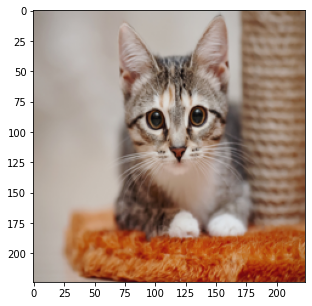

In [74]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[3])

plt.show()

In [75]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array_test[3])

plt.show()

IndexError: ignored

In [76]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


<class 'PIL.Image.Image'>


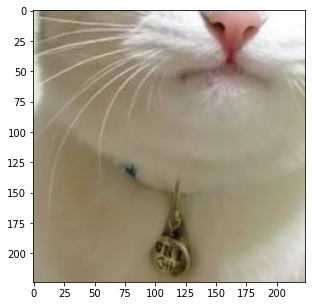

In [77]:
img = Image.open(img_list[4])

img_new = crop_center(img, 224, 224)

print(type(img_new))

plt.imshow(img_new)

plt.show()

img.close()

## Kerasでも読み込んでみよう

In [78]:
import keras

keras.__version__

'2.4.3'

In [79]:
from keras.preprocessing.image import load_img, img_to_array

In [80]:
img_keras = load_img(img_list[4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.8235294 , 0.78431374, 0.81960785],
        [0.80784315, 0.76862746, 0.8039216 ],
        [0.8       , 0.7607843 , 0.79607844],
        ...,
        [0.04705882, 0.10588235, 0.11764706],
        [0.09411765, 0.16078432, 0.09803922],
        [0.19607843, 0.2627451 , 0.09803922]],

       [[0.84313726, 0.8039216 , 0.8392157 ],
        [0.8392157 , 0.8       , 0.8352941 ],
        [0.8392157 , 0.8       , 0.8352941 ],
        ...,
        [0.07450981, 0.09411765, 0.10588235],
        [0.12941177, 0.14117648, 0.05882353],
        [0.21960784, 0.21960784, 0.02352941]],

       [[0.87058824, 0.83137256, 0.8666667 ],
        [0.87058824, 0.83137256, 0.8666667 ],
        [0.8745098 , 0.8352941 , 0.87058824],
        ...,
        [0.09411765, 0.13725491, 0.11372549],
        [0.14509805, 0.16470589, 0.03921569],
        [0.22352941, 0.22352941, 0.        ]],

       ...,

       [[0.7058824 , 0.6666667 , 0.6627451 ],
        [0.77254903, 0.73333335, 0.7294118 ],
        [0.7411765 , 0

<class 'PIL.Image.Image'>


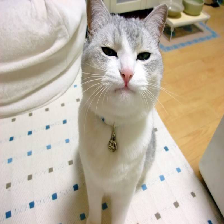

In [81]:
print(type(img_keras))

img_keras

## Resizeについて

In [82]:
import cv2

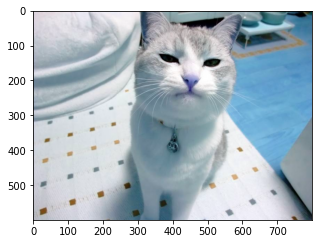

In [83]:
# 元のサイズの画像

img = cv2.imread(img_list[4])

plt.imshow(img)

plt.show()

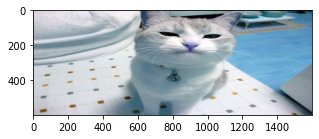

In [84]:
#plt.rcParams['figure.figsize'] = (10.0, 10.0)

img = cv2.imread(img_list[4])

# 横幅2倍にしてみる
img = cv2.resize(img, None, fx = 2, fy = 1)

plt.imshow(img)

plt.show()

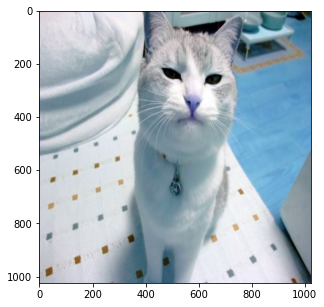

In [85]:
img = cv2.imread(img_list[4])


# cv2でリサイズ　ピクセル補間の方法も指定できる
'''
cv2.INTER_NEAREST :最近傍補間
cv2.INTER_LINEAR :双線形補間（拡大むき）
cv2.INTER_AREA :平均画素法。モアレを軽減させる内挿（縮小むき）
cv2.INTER_CUBIC:4×4 の近傍領域を利用するバイキュービック補間（拡大むき）
cv2.INTER_LANCZOS4:8×8 の近傍領域を利用する Lanczos法の補間

下に行くほど計算時間がかかる



https://www.tech-tech.xyz/opecv_resize.html

http://tessy.org/wiki/index.php?%B2%E8%C1%FC%A4%CE%A5%EA%A5%B5%A5%A4%A5%BA

https://github.com/ArunJayan/OpenCV-Python/search?q=cv2.resize&unscoped_q=cv2.resize

http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

'''

img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

# openCVの色形式

## グレースケール 

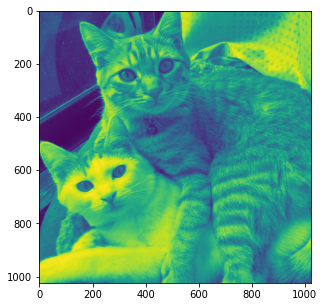

In [86]:
# 第二引数を0にするとグレースケールで読み込める
plt.rcParams['figure.figsize'] = (5.0, 5.0)

img = cv2.imread(img_list[5], 0)

# cv2でリサイズ
img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

In [87]:
img_array_1 = img_to_array(img) / 255.
img_array_1.shape

(1024, 1024, 1)

## BGRとRGB

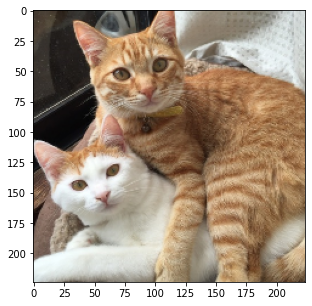

In [88]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGBチャネル

plt.imshow(img_rgb)

plt.show()

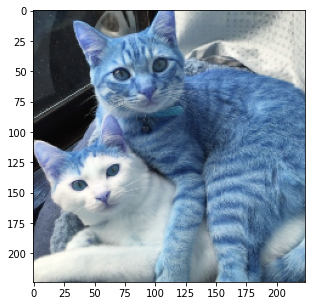

In [89]:
# BGRチャネル

plt.imshow(img)

plt.show()

PngとJpgの変換
---

In [90]:
# import os
# import cv2
# import sys
# import numpy as np
# from PIL import Image

# path_png = "/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/dog.01.png"
# path_jpg = "/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/dog.01.jpg"

# image = Image.open(path_png).convert('P')
# image.save(path_png)
# rgb_im = Image.open(path_png).convert('RGB')
# rgb_im.save(path_jpg)

# print(image)
# print(rgb_im)
# print(np.asarray(image).shape)
# print(np.asarray(rgb_im).shape)

In [91]:
# path_png = "/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/dog.03.png"
# path_jpg = "/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/dog.03.jpg"

# image = Image.open(path_png).convert('P')
# image.save(path_png)
# rgb_im = Image.open(path_png).convert('RGB')
# rgb_im.save(path_jpg)

# print(image)
# print(rgb_im)
# print(np.asarray(image).shape)
# print(np.asarray(rgb_im).shape)

In [92]:
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 6.5MB/s 
     |████████████████████████████████| 51kB 3.9MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [94]:
print(img_keras_array)

[[[0.8235294  0.78431374 0.81960785]
  [0.80784315 0.76862746 0.8039216 ]
  [0.8        0.7607843  0.79607844]
  ...
  [0.04705882 0.10588235 0.11764706]
  [0.09411765 0.16078432 0.09803922]
  [0.19607843 0.2627451  0.09803922]]

 [[0.84313726 0.8039216  0.8392157 ]
  [0.8392157  0.8        0.8352941 ]
  [0.8392157  0.8        0.8352941 ]
  ...
  [0.07450981 0.09411765 0.10588235]
  [0.12941177 0.14117648 0.05882353]
  [0.21960784 0.21960784 0.02352941]]

 [[0.87058824 0.83137256 0.8666667 ]
  [0.87058824 0.83137256 0.8666667 ]
  [0.8745098  0.8352941  0.87058824]
  ...
  [0.09411765 0.13725491 0.11372549]
  [0.14509805 0.16470589 0.03921569]
  [0.22352941 0.22352941 0.        ]]

 ...

 [[0.7058824  0.6666667  0.6627451 ]
  [0.77254903 0.73333335 0.7294118 ]
  [0.7411765  0.7019608  0.69803923]
  ...
  [0.22745098 0.16470589 0.10196079]
  [0.20392157 0.14117648 0.09019608]
  [0.18431373 0.13333334 0.09803922]]

 [[0.7490196  0.70980394 0.7058824 ]
  [0.7882353  0.7490196  0.74509805]


In [95]:
img_keras_array.shape

(224, 224, 3)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cat_img_array,cat_y, train_size=0.8)

In [99]:
X_train.shape

(4, 224, 224, 3)

In [100]:
y_train.shape

(4,)

In [101]:
X_train_shape = X_train.reshape(-1,224,224,3)
X_train_shape.shape
X_train_shape = X_train_shape.shape[1:]
X_train_shape

(224, 224, 3)

In [102]:
from keras import optimizers

In [103]:
input_data = tf.keras.layers.Input(shape=X_train_shape) # 入力層
# hidden = tf.keras.layers.Reshape((28, 28, 1), input_shape=(28,28))(input_data)
x_1 = tf.keras.layers.Conv2D((128), (3,3), activation='relu')(input_data)
x_2 = tf.keras.layers.Flatten()(x_1)
x_3 = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x_2)#1層目
x_4 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(x_3)#2層目
x_5 = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x_4)

output = tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)(x_5) # 出力層

model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,                  # トレーニングデータ
                    epochs=10,                        # トレーニングの回数
                    batch_size=100,                     # 勾配更新ごとのサンプル数
                    verbose=1,                         # 進行状況の表示（0：非表示、1,2：表示）
                    validation_data=(X_test, y_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 128)     3584      
_________________________________________________________________
flatten (Flatten)            (None, 6308352)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               807469184 
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66    

【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。
《データ拡張のためのライブラリ》
データ拡張にはalbumentationsなどがあります。
albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries
また、Kerasを使う場合はImageDataGeneratorも便利です。

CNN の学習を行う場合にオーグメンテーション (augmentation) を行い、学習データのバリエーションを増やすことで精度向上ができる場合がある。
Keras の preprocessing.image モジュールに含まれる ImageDataGenerator を使用すると、リアルタイムにオーグメンテーションを行いながら、学習が行える。

キーワード：
ImageDataGenerator
オーグメンテーション (augmentation)

In [104]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [105]:
classes = ['dog', 'cat']

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training',
        target_size=(224, 224),
        batch_size=3,
        classes=classes,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/test',
        target_size=(224, 224),
        batch_size=3,
        classes=classes,
        class_mode='binary')

model.fit_generator(
        train_generator,
        steps_per_epoch=1,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=2)

Found 12 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1/1 [==============================] - 6s 6s/step - loss: 10.7454 - accuracy: 0.3333 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 5s 5s/step - loss: 10.7454 - accuracy: 0.3333 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 5s 5s/step - loss: 10.7454 - accuracy: 0.3333 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 5s 5s/step - loss: 10.7454 - accuracy: 0.3333 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 5s 5s/step - loss: 5.3727 - accuracy: 0.6667 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 4s 4s/step - loss: 10.7454 - accuracy: 0.3333 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 5s 5s/step - loss: 10.7454 - accuracy: 0.3333 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 8/50
1/1 [==============================

拡張したデータを格納する。
---

In [108]:
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/preview'

In [109]:
i = 0
for batch in train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training',
        target_size=(224, 224),
        batch_size=3,
        classes=classes,
        class_mode='binary',
        save_to_dir=DATA_DIR,
        save_format='jpeg'):
    i += 1
    if i == 10:
        break  # 停止しないと無限ループ

Found 12 images belonging to 2 classes.


In [110]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/preview/_1_1049918.jpeg')
# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/preview/_1_1049918.jpeg')
img.show()
# cv2.imshow('_1_1049918', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

【問題3】物体検出データセットの用意
===
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。
《アノテーションのためのツール》
アノテーションツールにはLabelImgなどがあります。
https://github.com/tzutalin/labelImg

In [ ]:
!ls

In [ ]:
!cd drive
!pip3 install pyqt5 lxml # Install qt and lxml by pip

In [ ]:
!make qt5py3

In [ ]:
!cd labelImg

In [ ]:
!cd

In [ ]:
!sudo apt install pyqt5-dev-tools

In [ ]:
!sudo apt install python3-pip

In [ ]:
!sudo pip3 install lxml

In [ ]:
!cd /content/drive/MyDrive/Colab Notebooks/diveintocode-ml

In [ ]:
!cd drive

In [ ]:
!ls

In [ ]:
!cd drive

In [ ]:
ls

In [ ]:
cd drive

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/diveintocode-ml

In [ ]:
mkdir labelImg

In [ ]:
cd labelImg 

In [ ]:
!git clone https://github.com/tzutalin/labelImg.git

In [ ]:
cd labelImg

In [ ]:
!make qt5py3

In [ ]:
!python3 labelImg.py

In [ ]:
!sudo apt install libxkbcommon-x11-0

In [ ]:
!python3 labelImg.py

In [111]:
im_list = sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/*'))
im_list

['/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.01.jpg',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.01.xml',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.02.jpg',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.02.xml',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.03.jpg',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.03.xml',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.04.jpg',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.04.xml',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.05.jpg',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.05.xml',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/diveintocode-ml/training/cat/cat.07.xml']